In [1]:
# import thrid-party libs
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'

# change style
plt.style.use('fivethirtyeight')
# load data and check if it works
terrorism_db=pd.read_excel('global_terrorism_db.xlsx')
terrorism_db.head(5)

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaT       58   
1  197000000002   1970       0     0        NaN         0        NaT      130   
2  197001000001   1970       1     0        NaN         0        NaT      160   
3  197001000002   1970       1     0        NaN         0        NaT       78   
4  197001000003   1970       1     0        NaN         0        NaT      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [2]:
# DATA CLEANING
terrorism_db.rename(columns={
  "iyear": "Year",
  "imonth": "Month",
  "iday": "Day",
  "country_txt": "Country",
  "region_txt": "Region",
  "provstate": "Provincial_State",
  "city": "City",
  "latitude": "Latitude",
  "longitude": "Longitude",
  "summary": "Summary",
  "attacktype1_txt": "Attack_Type",
  "targtype1_txt": "Target_Type",
  "targsubtype1_txt": "Target_Sub_Type",
  "target1": "Target",
  "gname": "Group",
  "weaptype1_txt": "Weapon_Type",
  "natlty1_txt":"Nationality",
  "nkill": "Killed",
  "nwound": "Wounded",
  "motive": "Motive",
  "success": "Success",
  "ishostkid": "Is_Hostage_a_Kid",
  "nhostkid": "Kids_Hostage"
},inplace=True)

# Query only the columns that we want to use
terrorism_db=terrorism_db[[
     "Year",
     "Month",
     "Day",
     "country",
     "Country",
     "Region",
     "Provincial_State",
     "City",
     "Latitude",
     "Longitude",
     "Summary",
     "Attack_Type",
     "Target_Type",
     "Target_Sub_Type",
     "Target",
     "Group",
     "Weapon_Type",
     "natlty1",
     "Nationality",
     "Killed",
     "Wounded",
     "Motive",
     "Success",
     "Is_Hostage_a_Kid",
     "Kids_Hostage"
]]
terrorism_db['Casualities']=terrorism_db['Killed']+terrorism_db['Wounded']
terrorism_db = terrorism_db.drop_duplicates(keep=False)

# Data information
terrorism_db.info()
terrorism_db.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 196766 entries, 0 to 209705
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              196766 non-null  int64  
 1   Month             196766 non-null  int64  
 2   Day               196766 non-null  int64  
 3   country           196766 non-null  int64  
 4   Country           196766 non-null  object 
 5   Region            196766 non-null  object 
 6   Provincial_State  196766 non-null  object 
 7   City              196339 non-null  object 
 8   Latitude          192753 non-null  float64
 9   Longitude         192752 non-null  float64
 10  Summary           139825 non-null  object 
 11  Attack_Type       196766 non-null  object 
 12  Target_Type       196766 non-null  object 
 13  Target_Sub_Type   186094 non-null  object 
 14  Target            196230 non-null  object 
 15  Group             196766 non-null  object 
 16  Weapon_Type       196766 

Year                     0
Month                    0
Day                      0
country                  0
Country                  0
Region                   0
Provincial_State         0
City                   427
Latitude              4013
Longitude             4014
Summary              56941
Attack_Type              0
Target_Type              0
Target_Sub_Type      10672
Target                 536
Group                    0
Weapon_Type              0
natlty1               1873
Nationality           1873
Killed               11285
Wounded              18452
Motive              142718
Success                  0
Is_Hostage_a_Kid       176
Kids_Hostage        180414
Casualities          19144
dtype: int64

In [3]:
# Cleaned data which is ready to be mined and presented
display(terrorism_db)

Year  Month  Day  country             Country  \
0       1970      7    2       58  Dominican Republic   
1       1970      0    0      130              Mexico   
2       1970      1    0      160         Philippines   
3       1970      1    0       78              Greece   
4       1970      1    0      101               Japan   
...      ...    ...  ...      ...                 ...   
209701  2020     12   31      228               Yemen   
209702  2020     12   31      228               Yemen   
209703  2020     12   31       75             Germany   
209704  2020     12   31        4         Afghanistan   
209705  2020     12   31       33        Burkina Faso   

                             Region Provincial_State           City  \
0       Central America & Caribbean         National  Santo Domingo   
1                     North America          Federal    Mexico city   
2                    Southeast Asia           Tarlac        Unknown   
3                    Western Europe           Attica         Athens   
4                         East Asia          Fukouka        Fukouka   
...                             ...              ...            ...   
209701   Middle East & North Africa      Al Hudaydah          Sabaa   
209702   Middle East & North Africa      Al Hudaydah   Beit Maghari   
209703               Western Europe     Lower Saxony        Leipzig   
209704                   South Asia            Kabul          Kabul   
209705           Sub-Saharan Africa            Sahel          Kelbo   

         Latitude   Longitude  ... Weapon_Type natlty1         Nationality  \
0       18.456792  -69.951164  ...     Unknown    58.0  Dominican Republic   
1       19.371887  -99.086624  ...     Unknown    21.0             Belgium   
2       15.478598  120.599741  ...     Unknown   217.0       United States   
3       37.997490   23.762728  ...  Explosives   217.0       United States   
4       33.580412  130.396361  ...  Incendiary   217.0       United States   
...           ...         ...  ...         ...     ...                 ...   
209701  15.305307   43.019490  ...  Explosives   228.0               Yemen   
209702  13.931337   43.478924  ...  Explosives   228.0               Yemen   
209703  51.342239   12.374772  ...  Incendiary    75.0             Germany   
209704  34.523842   69.140304  ...    Firearms     4.0         Afghanistan   
209705  13.864252   -1.161453  ...    Firearms    33.0        Burkina Faso   

       Killed Wounded Motive Success  Is_Hostage_a_Kid Kids_Hostage  \
0         1.0     0.0    NaN       1               0.0          NaN   
1         0.0     0.0    NaN       1               1.0          1.0   
2         1.0     0.0    NaN       1               0.0          NaN   
3         NaN     NaN    NaN       1               0.0          NaN   
4         NaN     NaN    NaN       1               0.0          NaN   
...       ...     ...    ...     ...               ...          ...   
209701    NaN     NaN    NaN       1               0.0          NaN   
209702    NaN     NaN    NaN       1               0.0          NaN   
209703    0.0     0.0    NaN       1               0.0          NaN   
209704    1.0     0.0    NaN       1               0.0          NaN   
209705    5.0     0.0    NaN       1              -9.0          NaN   

        Casualities  
0               1.0  
1               0.0  
2               1.0  
3               NaN  
4               NaN  
...             ...  
209701          NaN  
209702          NaN  
209703          0.0  
209704          1.0  
209705          5.0  

[196766 rows x 26 columns]

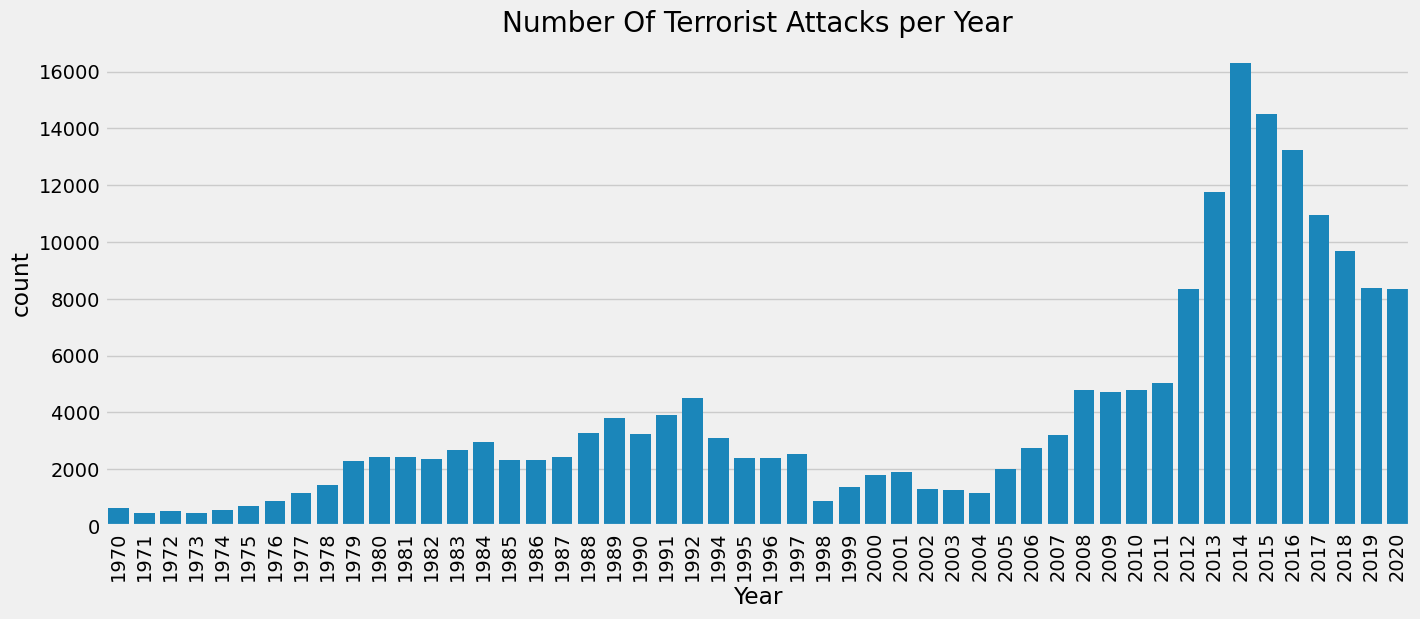

In [4]:
# NUMBER OF TERRORIST ACTIVITIES PER YEAR
plt.subplots(figsize=(15,6))
sns.countplot(x='Year', data=terrorism_db)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks per Year')
plt.show()

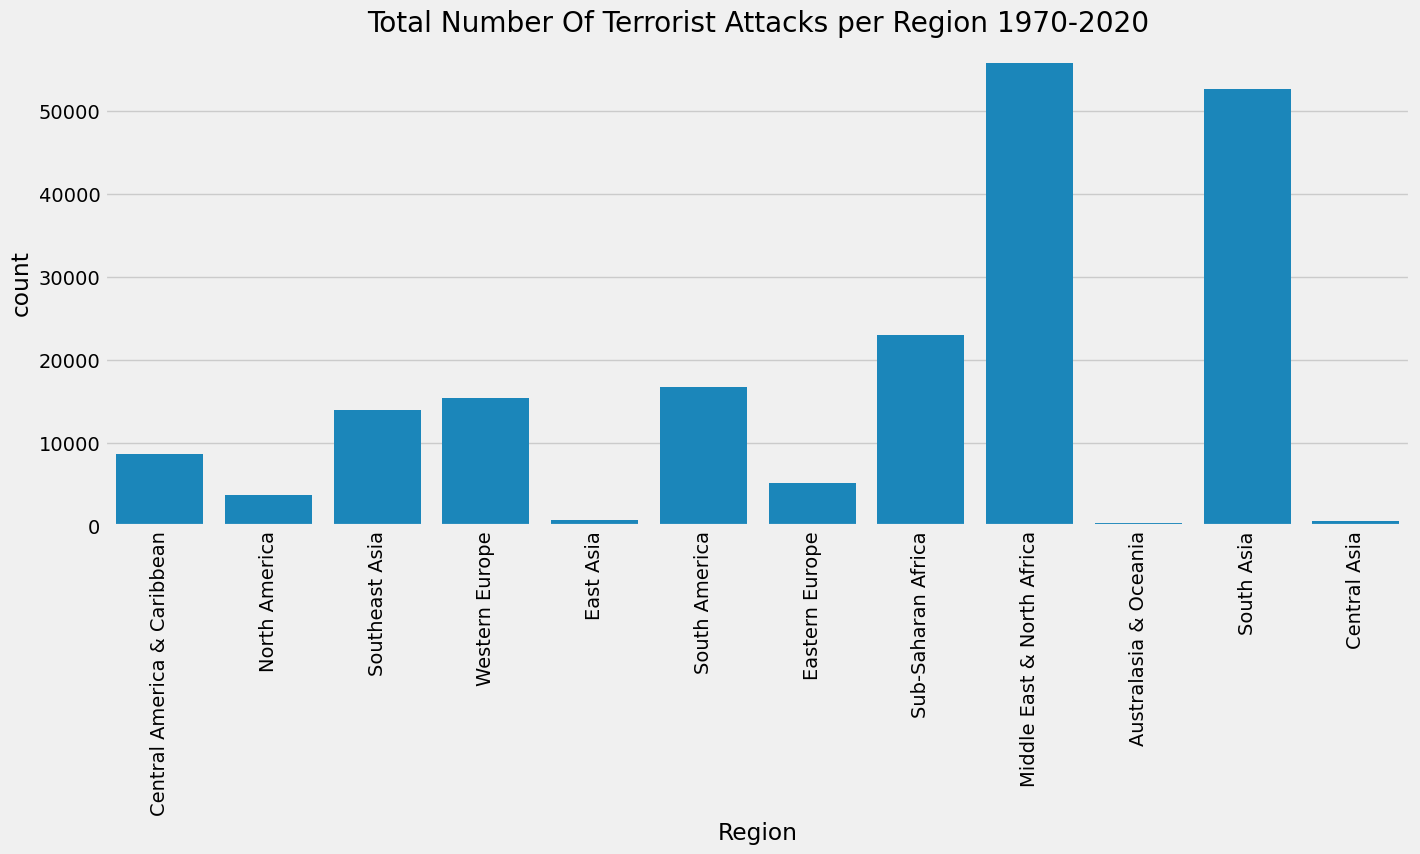

In [5]:
# TOTAL NUMBER OF TERRORIST ACTIVITIES PER REGION
plt.subplots(figsize=(15,6))
sns.countplot(x='Region', data=terrorism_db)
plt.xticks(rotation=90)
plt.title('Total Number Of Terrorist Attacks per Region 1970-2020')
plt.show()

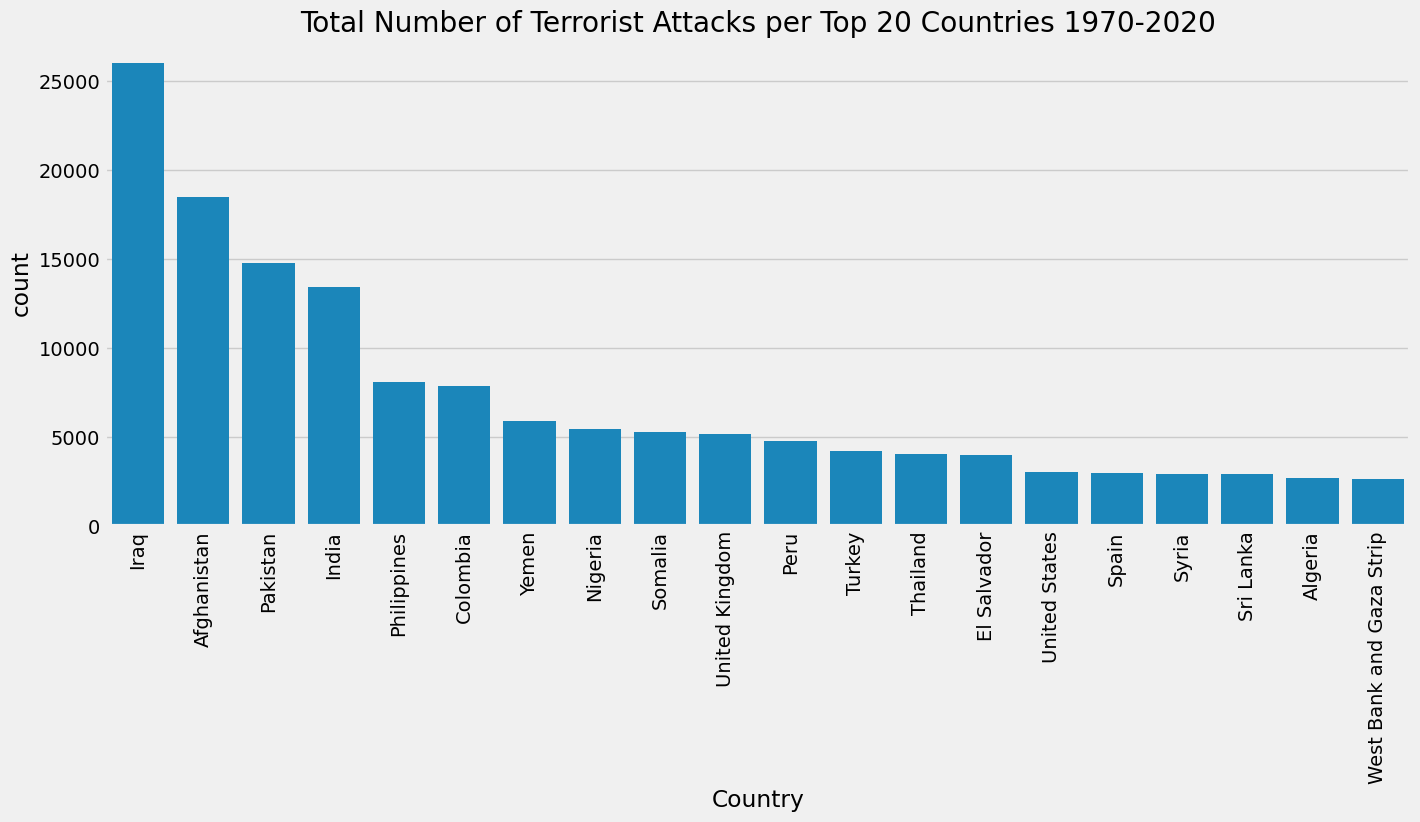

In [6]:
# NUMBER OF TERRORIST ACTIVITIES PER Country
plt.subplots(figsize=(15,6))
sns.countplot(x='Country', data=terrorism_db,order=terrorism_db['Country'].value_counts().iloc[:20].index)
plt.xticks(rotation=90)
plt.title('Total Number of Terrorist Attacks per Top 20 Countries 1970-2020')
plt.show()

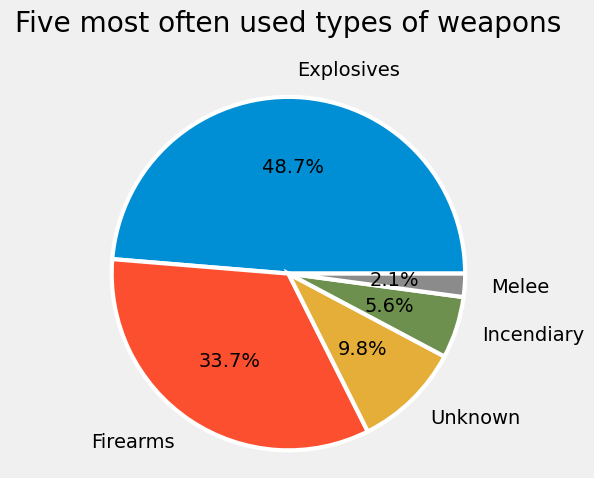

In [7]:
# Five most often used types of weapons
weaponRatio = terrorism_db['Weapon_Type'].value_counts()[:5]
weaponLabels = terrorism_db['Weapon_Type'].value_counts()[:5].keys()

plt.pie(weaponRatio, labels=weaponLabels,autopct='%1.1f%%',labeldistance=1.15,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.axis('equal')
plt.title("Five most often used types of weapons", x=0.5, y=1.1)
plt.show() 

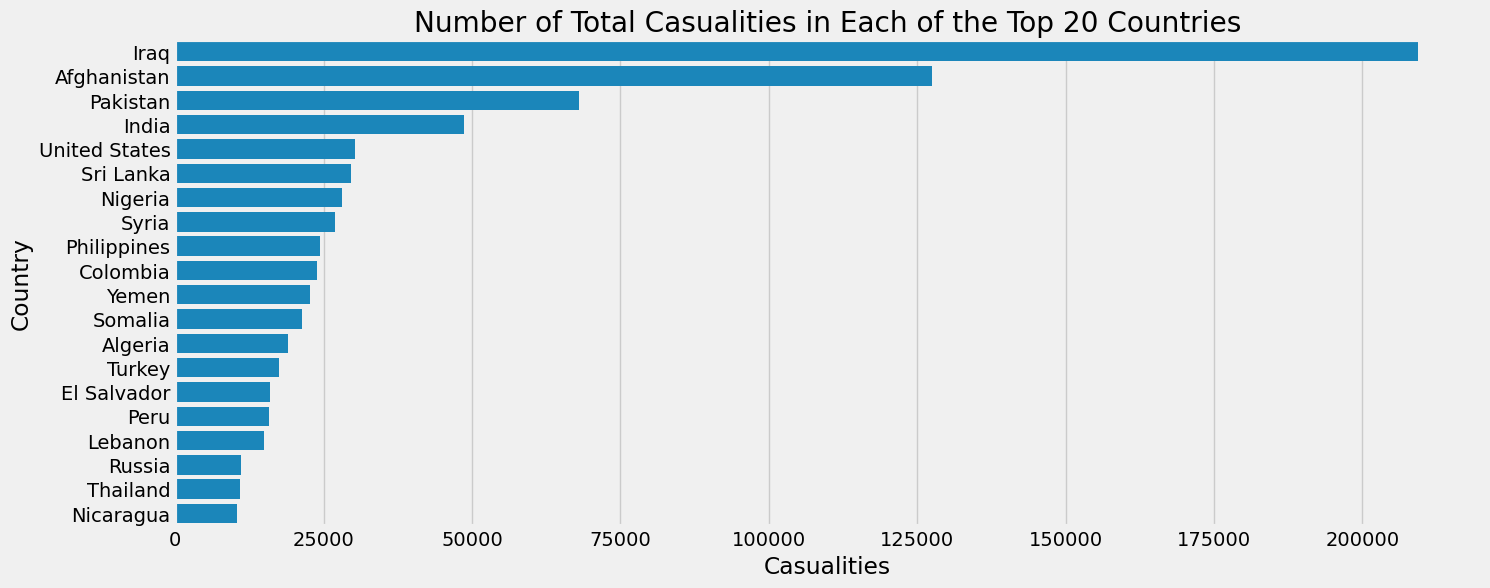

In [8]:
# Number of Total Casualities in Each Country
plt.subplots(figsize=(15,6))
count_cas = terrorism_db.groupby('Country')['Casualities'].sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:20]
sns.barplot(x=count_cas.Casualities, y=count_cas.Country,orient='h')
plt.title('Number of Total Casualities in Each of the Top 20 Countries')
plt.show()

ValueError: Could not interpret value `index` for `x`. An entry with this name does not appear in `data`.

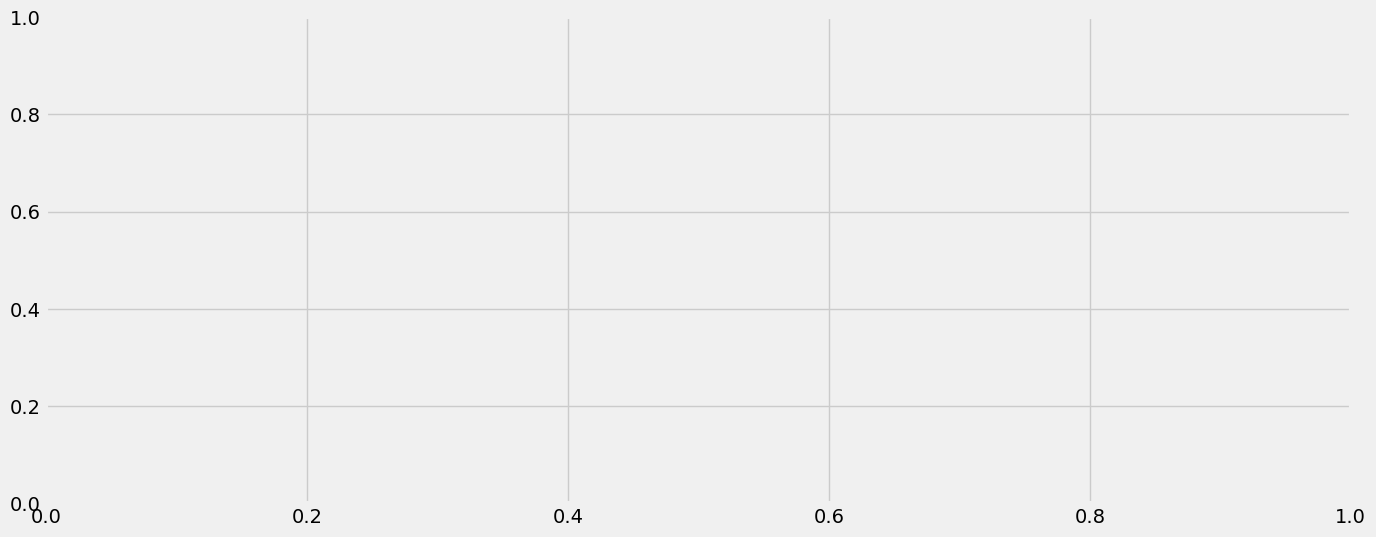

In [9]:
# Number Of Terrorist Attacks in the Middle East & North Africa per Year
region1=terrorism_db[terrorism_db.Region == "Middle East & North Africa"]
plt.subplots(figsize=(15,6))
data = region1['Country'].value_counts().reset_index(name='Count')
sns.barplot(x='index', y='Count', data=data)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks in the Middle East & North Africa per Year')
plt.show()

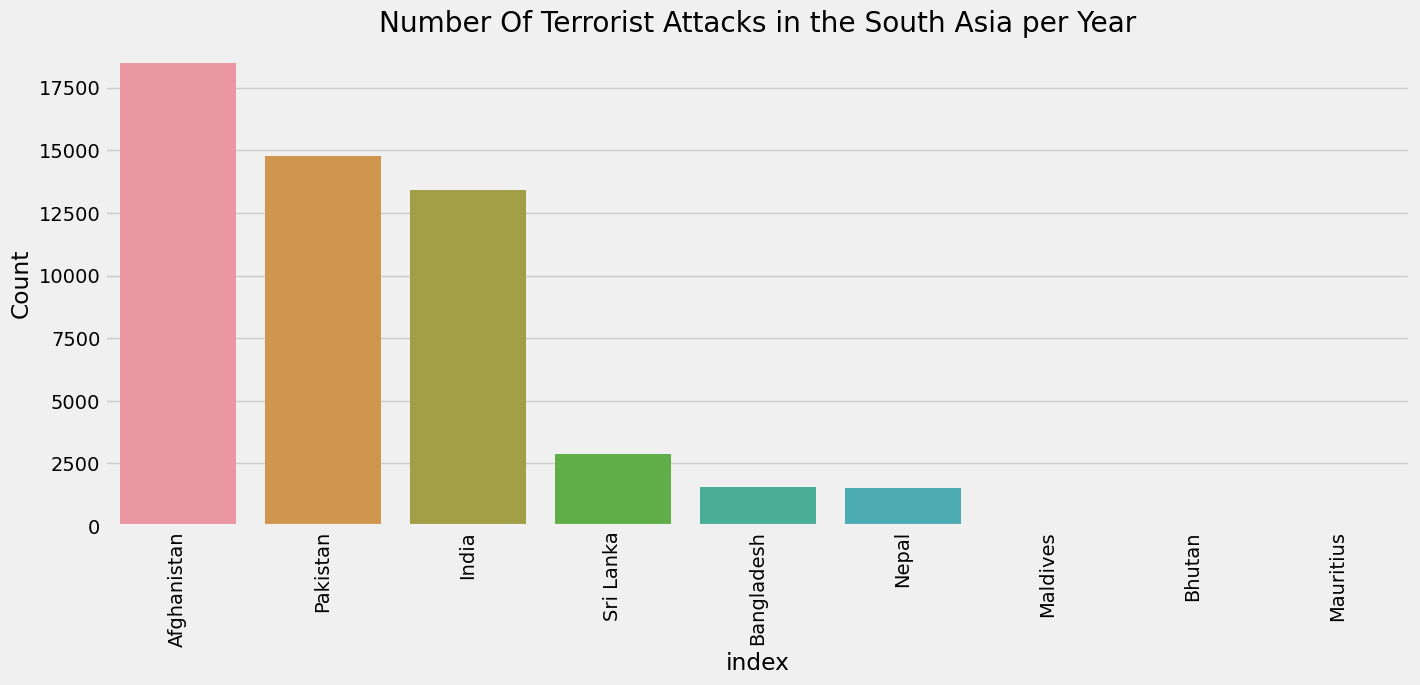

In [88]:
# Number Of Terrorist Attacks in the South Asia per Year
region1=terrorism_db[terrorism_db.Region == "South Asia"]
plt.subplots(figsize=(15,6))
data = region1['Country'].value_counts().reset_index(name='Count')
sns.barplot(x='index', y='Count', data=data)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks in the South Asia per Year')
plt.show()

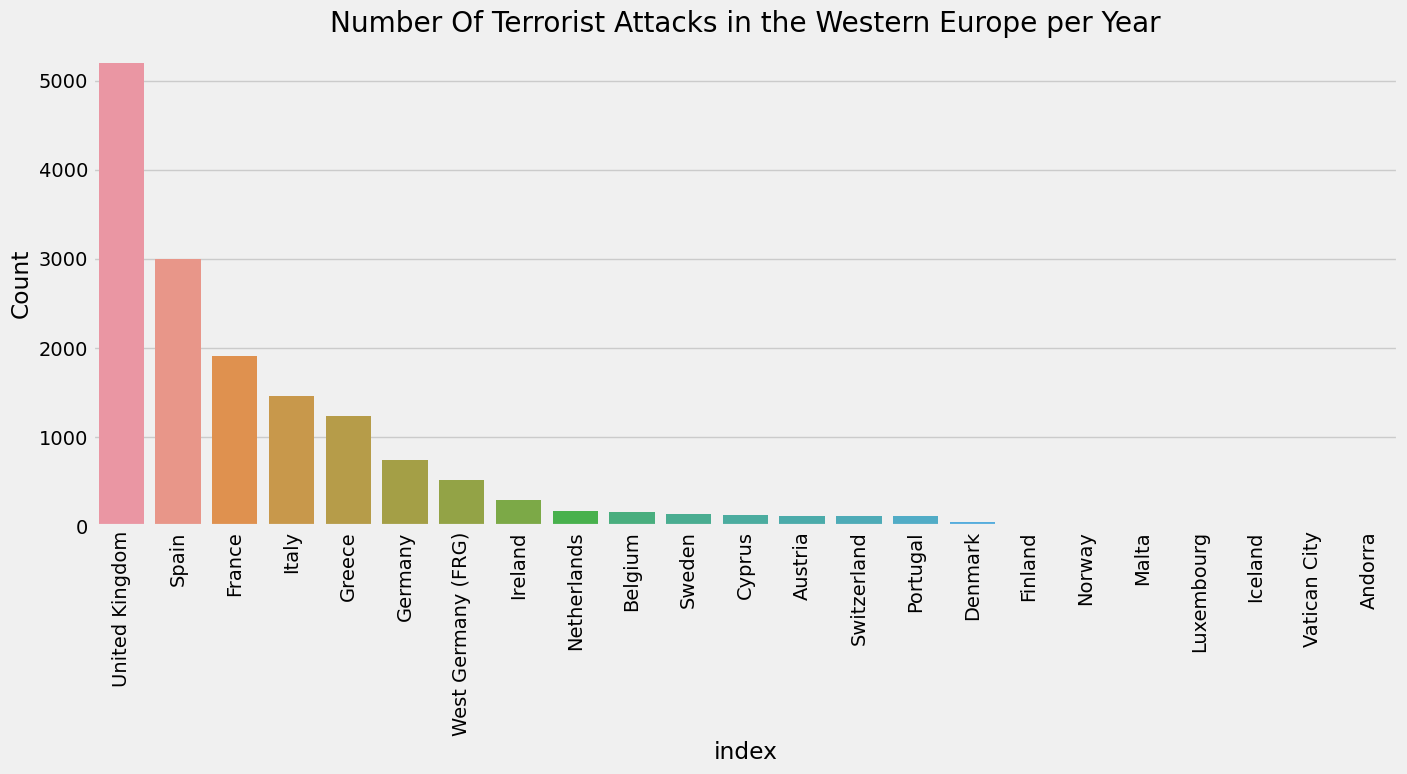

In [89]:
# Number Of Terrorist Attacks in the Western Europe per Year
region1=terrorism_db[terrorism_db.Region == "Western Europe"]
plt.subplots(figsize=(15,6))
data = region1['Country'].value_counts().reset_index(name='Count')
sns.barplot(x='index', y='Count', data=data)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks in the Western Europe per Year')
plt.show()

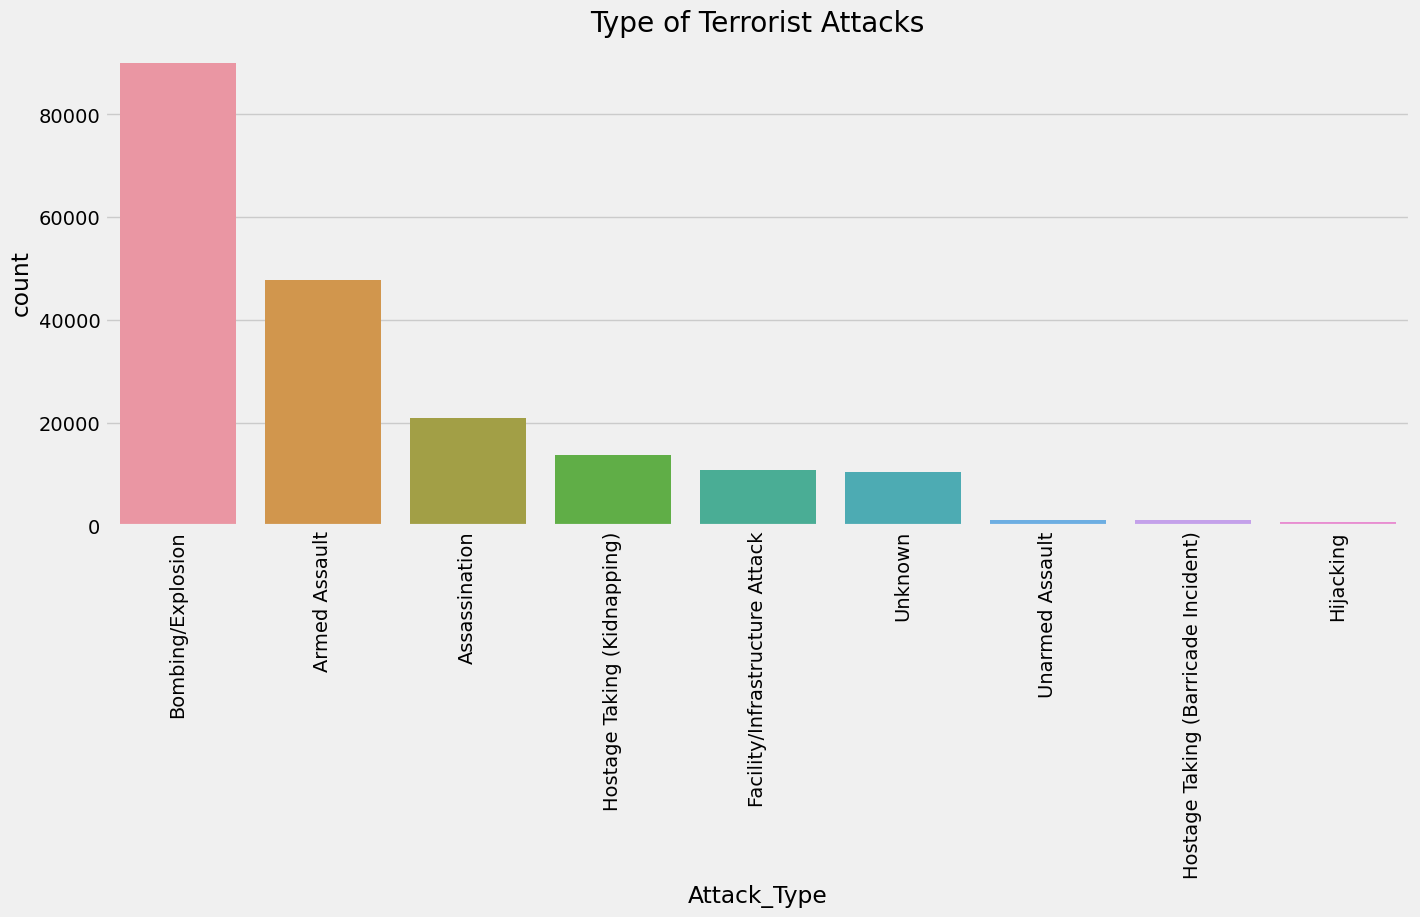

In [90]:
plt.subplots(figsize=(15,6))
sns.countplot(x = 'Attack_Type',data=terrorism_db,order=terrorism_db.Attack_Type.value_counts().index)

plt.xticks(rotation=90)
plt.title('Type of Terrorist Attacks')
plt.show()

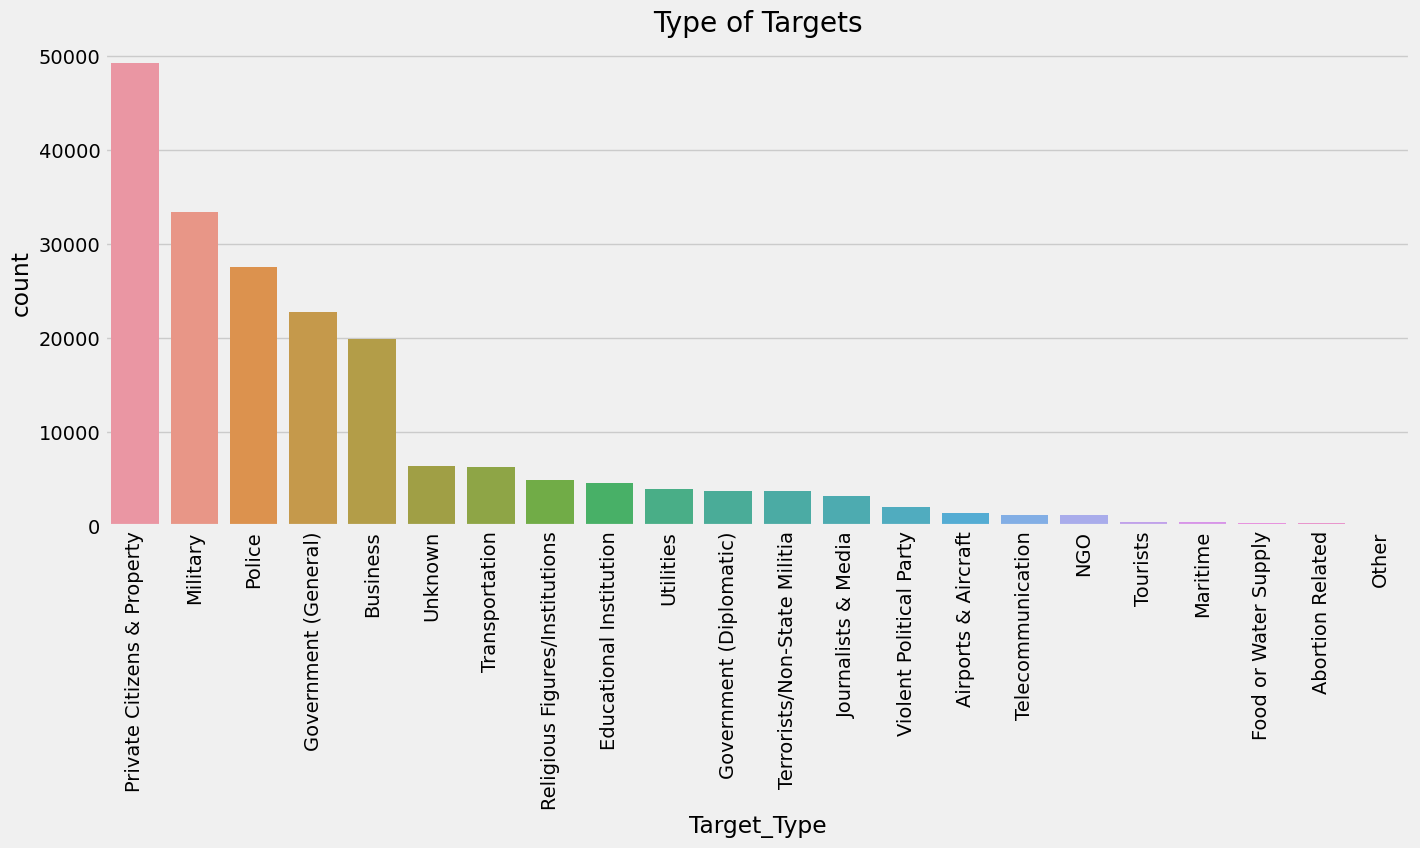

In [91]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Target_Type',data=terrorism_db,order=terrorism_db.Target_Type.value_counts().index)
plt.xticks(rotation=90)
plt.title('Type of Targets')
plt.show()

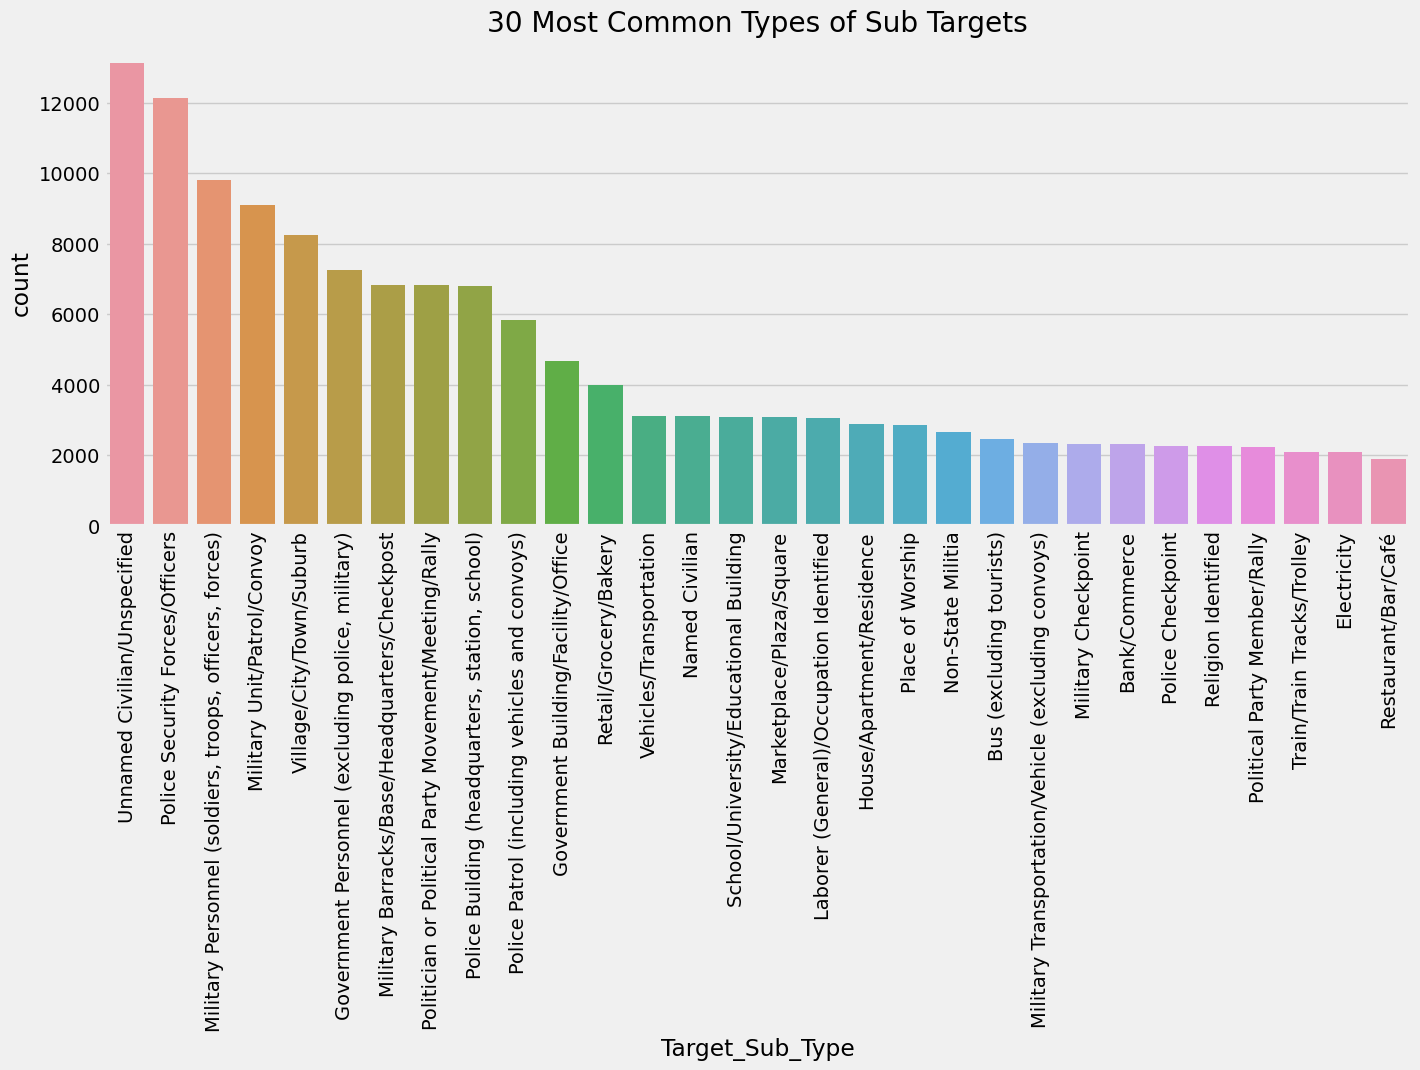

In [92]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Target_Sub_Type',data=terrorism_db,order=terrorism_db.Target_Sub_Type.value_counts()[:30].index)
plt.xticks(rotation=90)
plt.title('30 Most Common Types of Sub Targets')
plt.show()

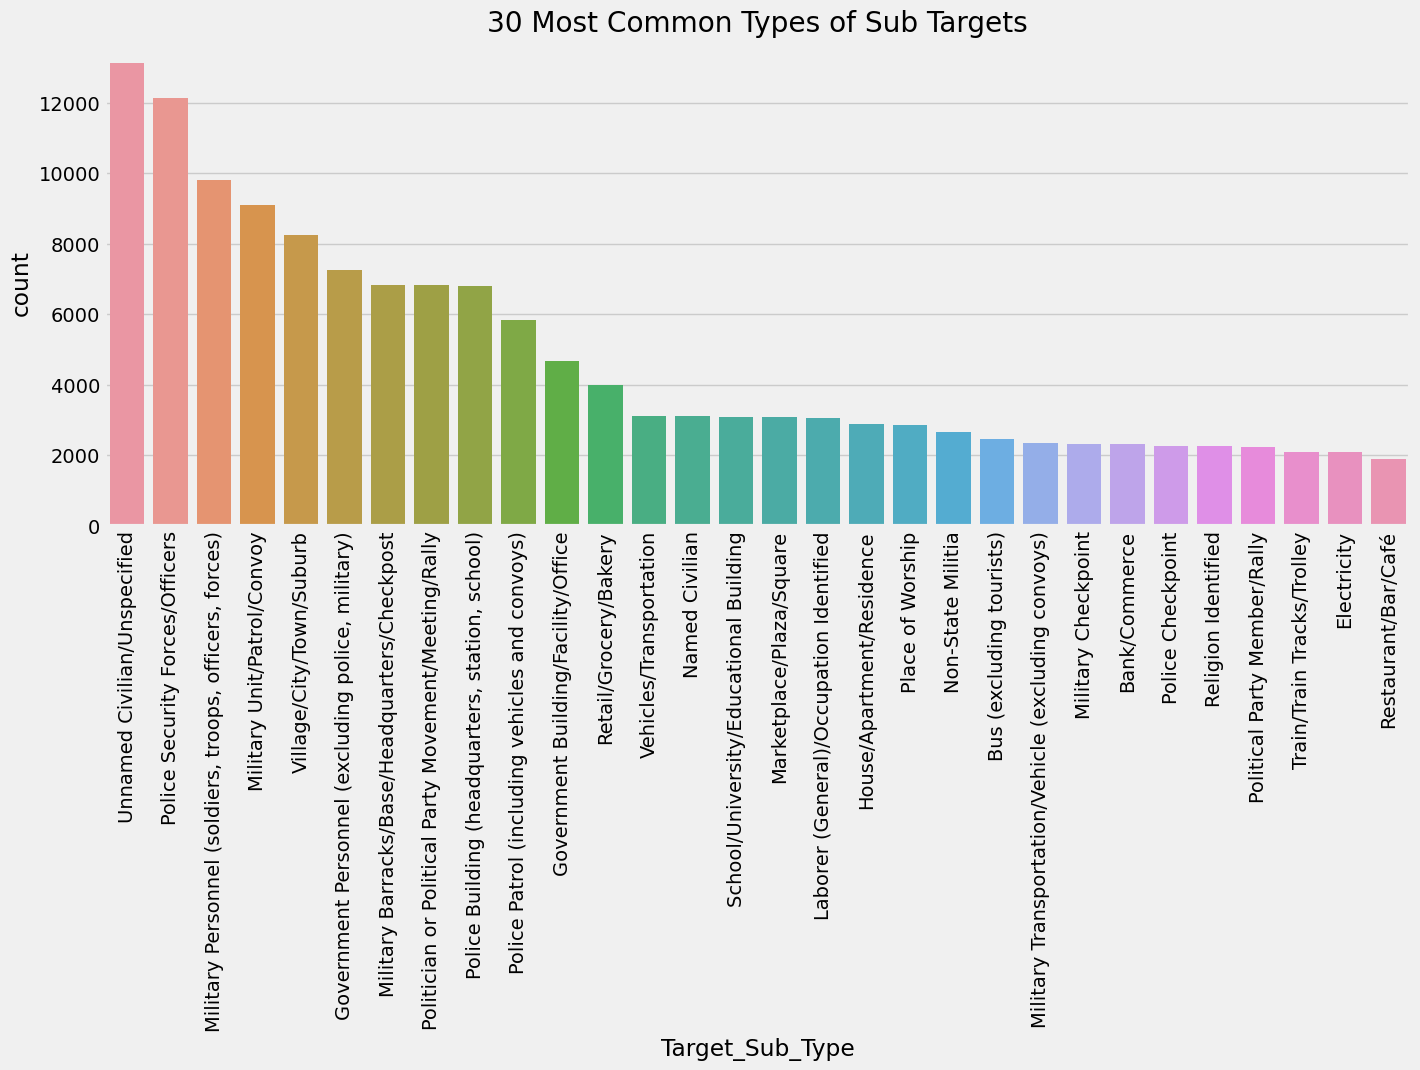

In [93]:
stats = terrorism_db[['Country','Killed','Wounded','Casualities']]
stats = stats.groupby(by=['Country']).sum().reset_index().sort_values(by=['Casualities'], ascending = False)
stats.head(20)
plt.subplots(figsize=(15,6))
sns.countplot(x='Target_Sub_Type',data=terrorism_db,order=terrorism_db.Target_Sub_Type.value_counts()[:30].index)
plt.xticks(rotation=90)
plt.title('30 Most Common Types of Sub Targets')
plt.show()

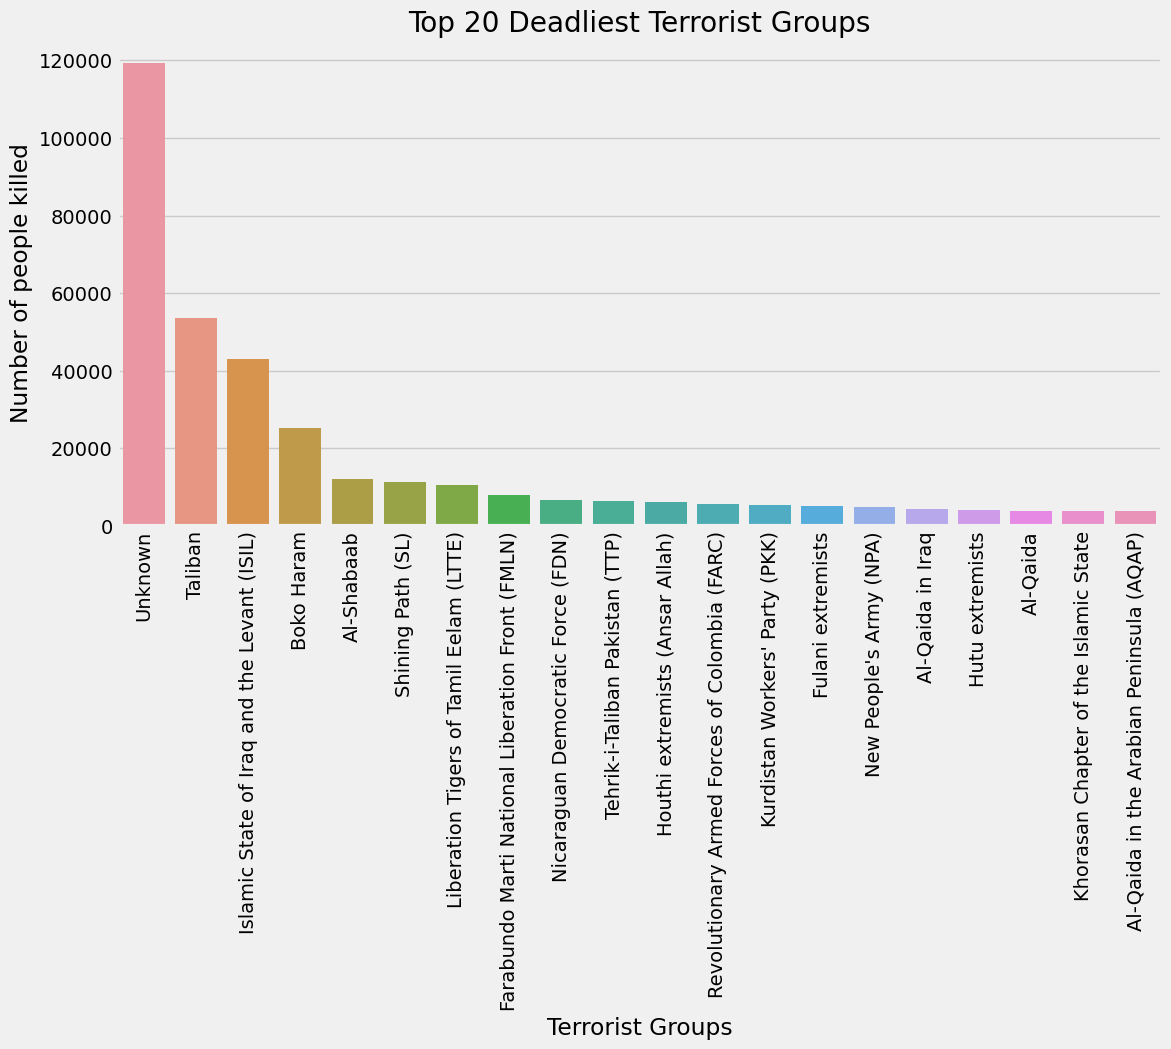

In [94]:
orgs= terrorism_db[['Group','Killed']].groupby(['Group'],axis=0).sum().sort_values('Killed', ascending=False).head(20)
plt.subplots(figsize=(12,6))
sns.barplot(x=orgs.index, y=orgs.Killed)
plt.title('Top 20 Deadliest Terrorist Groups')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 90)
plt.show()

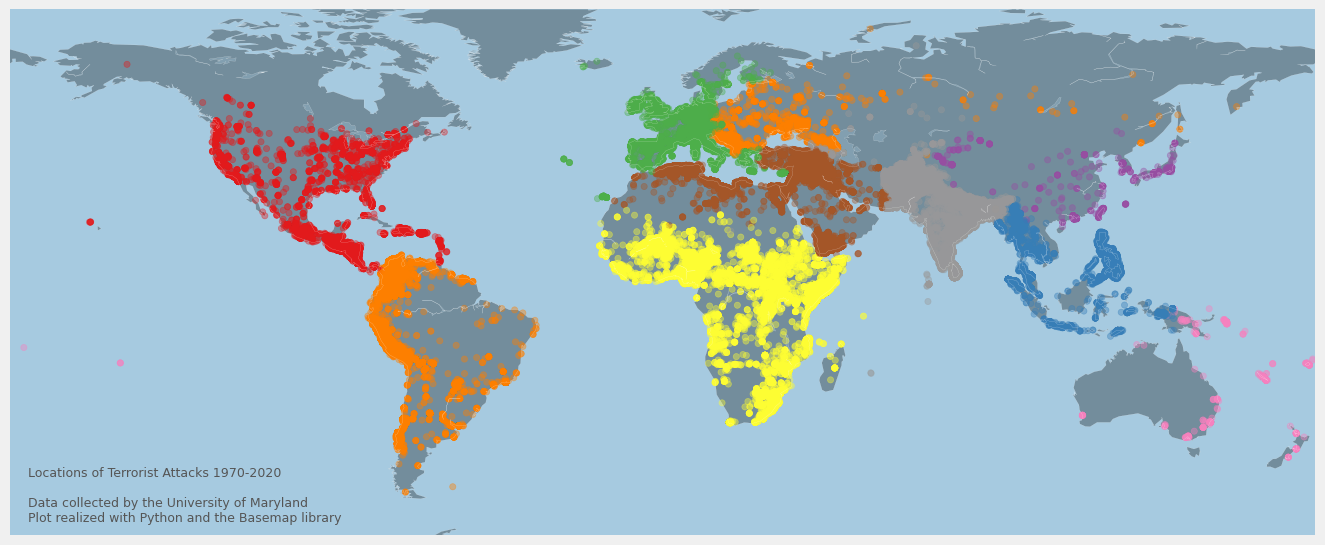

In [95]:
from mpl_toolkits.basemap import Basemap

# Set the dimension of the figure
plt.rcParams["figure.figsize"]=15,10;

# Make the background map
mapp=Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80);
mapp.drawmapboundary(fill_color='#A6CAE0', linewidth=0);
mapp.fillcontinents(color='black', alpha=0.3);
mapp.drawcoastlines(linewidth=0.1, color="white");

# prepare a color for each point depending on the continent.
data = pd.factorize(terrorism_db['Region'])[0]
 
# Add a point per position
mapp.scatter(
    x=terrorism_db['Longitude'], 
    y=terrorism_db['Latitude'], 
    s=20, 
    alpha=0.4, 
    c=data, 
    cmap="Set1"
)
 
# copyright and source data info
plt.text( -175, -62,'Locations of Terrorist Attacks 1970-2020\n\nData collected by the University of Maryland\nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=9, color='#555555' );


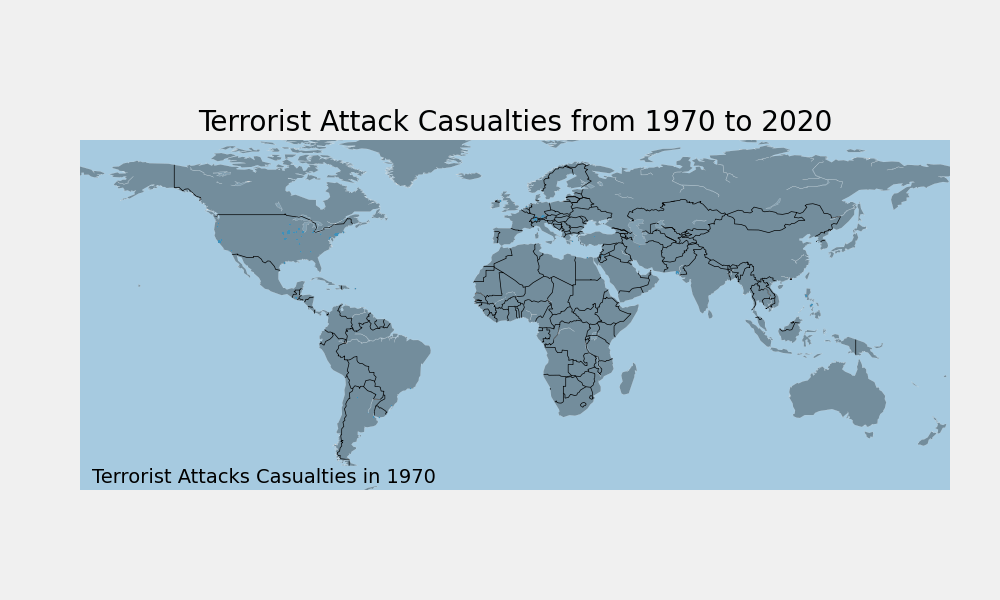

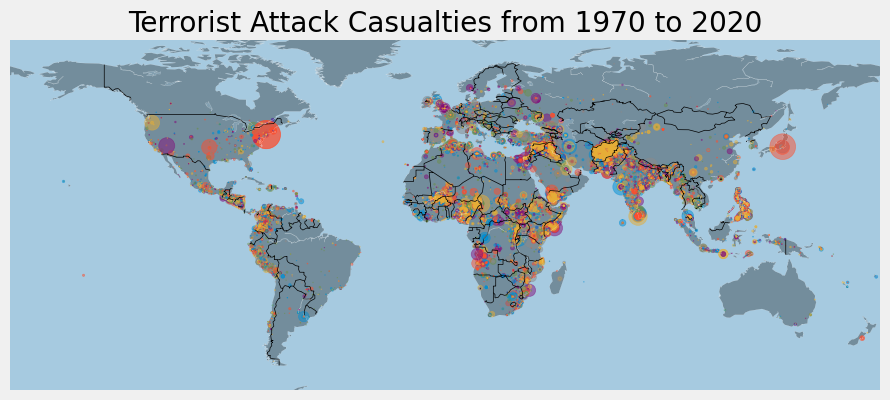

In [96]:
import imageio.v2 as imageio
from mpl_toolkits.basemap import Basemap
from IPython.display import Image

# Set the dimension of the figure
fig = plt.figure(figsize=(10, 6))
m = Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
m.drawcountries()
mapp.drawmapboundary(fill_color='#A6CAE0', linewidth=0);
mapp.fillcontinents(color='black', alpha=0.3);
mapp.drawcoastlines(linewidth=0.1, color="white");

# Loop through each year and update the plot
for year in range(1970, 2021):
    
    # Filter the dataset for the current year
    data = terrorism_db[terrorism_db['Year'] == year]

    # Update the plot
    m.scatter(data['Longitude'], data['Latitude'], s=data['Casualities']/(5+data['Casualities']/500), alpha=0.5)
    plt.title('Terrorist Attack Casualties from 1970 to 2020')
    yearText = plt.text(-175, -62,'Terrorist Attacks Casualties in {}'.format(year))
    
    # Save the plot as a png image
    filename = 'terrorist_attacks_{}.png'.format(year)
    plt.savefig(filename)
    
    yearText.remove()
    
# Combine the images into a gif
images = []
for year in range(1970, 2021):
    filename = 'terrorist_attacks_{}.png'.format(year)
    images.append(imageio.imread(filename))
imageio.mimsave('terrorist_attacks.gif', images, fps=5)

Image(filename='terrorist_attacks.gif', width=1325, height=545)

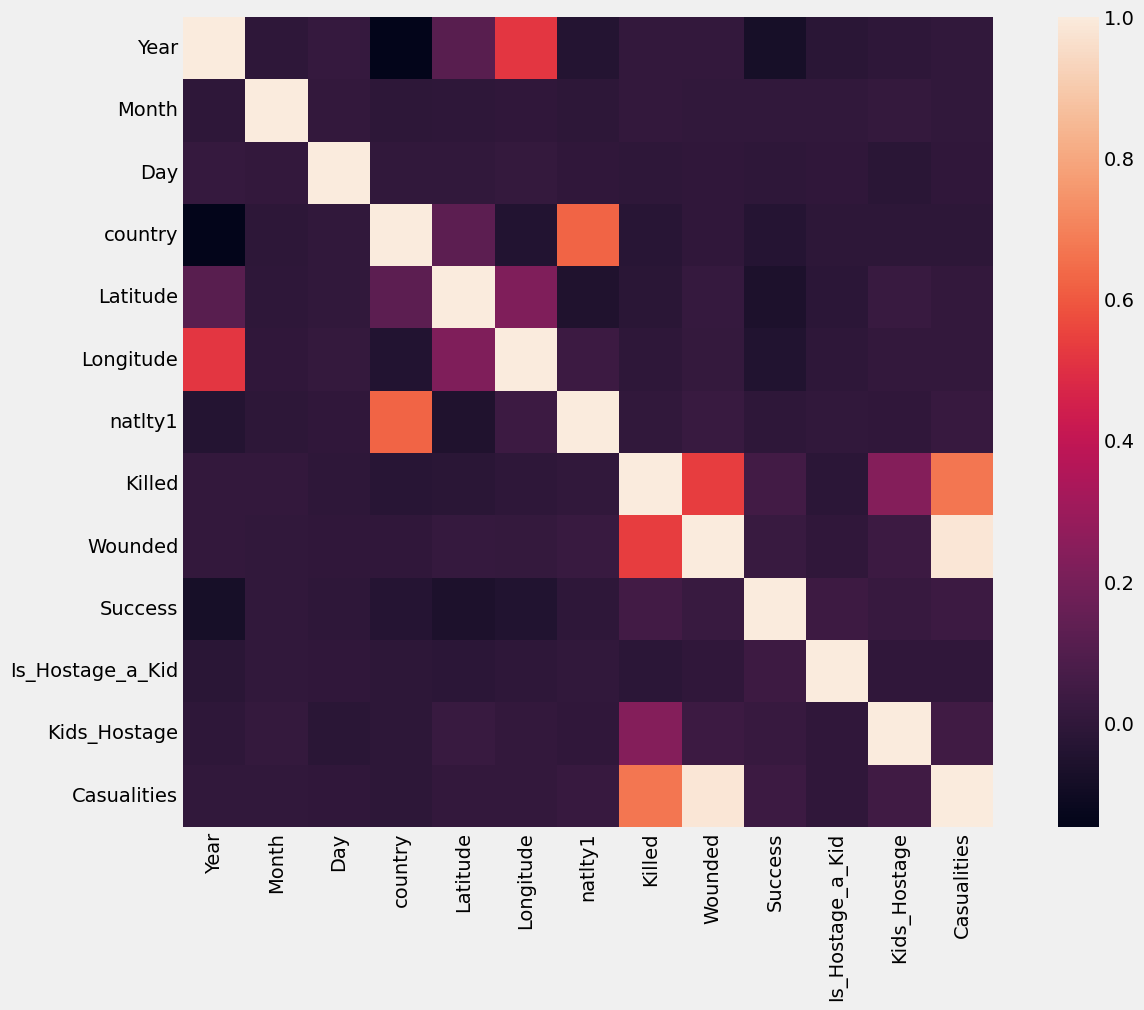

In [118]:
plt.subplots(figsize = (15,10))
sns.heatmap(terrorism_db.corr(), annot = False, square = True)
plt.show()
